# xarray: computations
The website lessons covered in this lesson are:
- [Lesson 3.2](https://nasa-sarp.github.io/sarp_lessons/sarp_lessons/1_python_progression/3-gridded_data/3-2_xarray_computation.html#intermediate-example-plotting-a-true-color-image) xarray Starting computations

In [1]:
import xarray as xr

## Reading different file formats

| Format | file extension | read example |
| --- | --- | --- |
| netCDF | `.nc` | `xr.open_dataset('filepath.nc')` |
| HDF | `.hdf` or `.h5` | `xr.open_dataset('filepath.h5', group='/variable/data')` or `xr.open_datatree('filepath.h5')` |
| tiff/geotiff | `.tif` | `xr.open_dataset('filepath.tiff')` |

- Icesat-2 HDF file download: https://n5eil01u.ecs.nsidc.org/DP9/ATLAS/ATL03.006/2025.03.02/ATL03_20250302230238_11732613_006_01.h5

## Opening one band of data

In [2]:
band3_ds = xr.open_dataset(
    'data/LC09_L2SP_015034_20250414_20250415_02_T1/LC09_L2SP_015034_20250414_20250415_02_T1_SR_B3.TIF',
)

## Sidequest: Opening Multi-band data

In [1]:
from pathlib import Path

import xarray as xr
import numpy as np

In [2]:
def preprocess_function(ds):
    """
    This function assigns a new value to the `band` coordinate that corresponds
    to the band number of in the filename.
    """
    # Extract band number
    filepath = Path(ds.encoding['source'])
    band_str = filepath.stem.split('_')[-1]
    # Assign as the coordinate
    ds = ds.assign_coords(xr.Coordinates({"band": [int(band_str[1])]}))
    return ds

In [4]:
landsat = xr.open_mfdataset(
    'data/LC09_L2SP_015034_20250414_20250415_02_T1/LC09_L2SP_015034_20250414_20250415_02_T1_SR_B*.TIF',
    concat_dim='band', combine='nested', preprocess=preprocess_function,
)

:::{note}
We are seeing a new file format here! a tiff

:::

When you start working with large amounts of data it becomes difficult for your computer to hold all of the information in memory at one time. To deal with this xarray has a feature called **lazy loading** where data is not immediately read from the data file into the code. This behavior is the default for multi-file datasets.

:::{admonition} Vocabulary
:class: tip
**Lazy loading:** The practice of not reading all the data when initially opening a large datafile. You can problem Python to read the data using `.load()`.
:::

In [ ]:
landsat.sel(band=1).max()  # .load()

## Data Inspection

In [18]:
band3_ds = xr.open_dataset(
    'data/LC09_L2SP_015034_20250414_20250415_02_T1/LC09_L2SP_015034_20250414_20250415_02_T1_SR_B3.TIF',
)

In [5]:
band3_ds.band_data.load()

<xarray.DataArray 'band_data' (band: 1, y: 7951, x: 7841)> Size: 249MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 63kB 1.737e+05 1.737e+05 ... 4.089e+05 4.089e+05
  * y            (y) float64 64kB 4.269e+06 4.269e+06 ... 4.031e+06 4.03e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point

Go through the following checklist with the person sitting next to you.

`````{admonition} Data Opening Checklist
:class: tip
1. What variables or measurements are available in this dataset?
2. How is the dataset organized? What is the shape or size?
3. What spatial and/or temporal range does this dataset cover?
4. Do there appear to be any nodata values in this dataset?
5. Do the variables appear to have reasonable values?
6. Make the simplest plot possible of 1-2 variables. Does it match your expectations?
`````

## Some more computations / manipulations

### Arithmetic

In [7]:
# subsetting to make things easier to see
band3_subset = band3_ds.band_data.isel(x=slice(4000, 5000), y=slice(4000, 5000))

In [33]:
band3_subset

<xarray.DataArray 'band_data' (band: 1, y: 1000, x: 1000)> Size: 4MB
array([[[ 9593.,  9625., 10219., ...,  9057.,  8877.,  9015.],
        [ 9739., 10158., 10376., ...,  9242.,  8769.,  8913.],
        [ 9969.,  9888., 10071., ...,  9080.,  8627.,  9093.],
        ...,
        [10081., 10495., 10576., ...,  9059.,  9144.,  9643.],
        [ 9498.,  9348.,  9524., ...,  9186.,  9328.,  9583.],
        [ 9631.,  9680.,  9992., ...,  9099.,  9276.,  9597.]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8kB 2.937e+05 2.937e+05 ... 3.236e+05 3.237e+05
  * y            (y) float64 8kB 4.149e+06 4.149e+06 ... 4.119e+06 4.119e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point

In [35]:
band3_subset / 200

<xarray.DataArray 'band_data' (band: 1, y: 1000, x: 1000)> Size: 4MB
array([[[47.965, 48.125, 51.095, ..., 45.285, 44.385, 45.075],
        [48.695, 50.79 , 51.88 , ..., 46.21 , 43.845, 44.565],
        [49.845, 49.44 , 50.355, ..., 45.4  , 43.135, 45.465],
        ...,
        [50.405, 52.475, 52.88 , ..., 45.295, 45.72 , 48.215],
        [47.49 , 46.74 , 47.62 , ..., 45.93 , 46.64 , 47.915],
        [48.155, 48.4  , 49.96 , ..., 45.495, 46.38 , 47.985]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8kB 2.937e+05 2.937e+05 ... 3.236e+05 3.237e+05
  * y            (y) float64 8kB 4.149e+06 4.149e+06 ... 4.119e+06 4.119e+06
    spatial_ref  int64 8B 0

In [40]:
band3_subset - 5000

<xarray.DataArray 'band_data' (band: 1, y: 1000, x: 1000)> Size: 4MB
array([[[4593., 4625., 5219., ..., 4057., 3877., 4015.],
        [4739., 5158., 5376., ..., 4242., 3769., 3913.],
        [4969., 4888., 5071., ..., 4080., 3627., 4093.],
        ...,
        [5081., 5495., 5576., ..., 4059., 4144., 4643.],
        [4498., 4348., 4524., ..., 4186., 4328., 4583.],
        [4631., 4680., 4992., ..., 4099., 4276., 4597.]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8kB 2.937e+05 2.937e+05 ... 3.236e+05 3.237e+05
  * y            (y) float64 8kB 4.149e+06 4.149e+06 ... 4.119e+06 4.119e+06
    spatial_ref  int64 8B 0

### Aggregations & Digging into documentation

* [`xarray.DataArray.max()`](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.max.html)

In [8]:
band3_subset.max()

<xarray.DataArray 'band_data' ()> Size: 4B
array(31359., dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0

In [38]:
band3_subset.max(dim='x')

<xarray.DataArray 'band_data' (band: 1, y: 1000)> Size: 4kB
array([[11554., 11564., 12510., 14514., 13026., 12018., 11524., 11873.,
        11506., 12352., 12090., 11990., 11575., 12133., 11998., 11855.,
        12272., 12484., 13050., 15432., 14019., 12166., 12143., 12290.,
        12449., 12423., 12098., 12394., 13140., 14090., 13908., 13669.,
        13941., 15158., 14941., 24693., 21012., 21401., 14024., 13614.,
        13505., 12768., 12702., 11690., 12981., 12794., 13501., 15364.,
        13885., 14194., 12523., 17261., 12310., 11614., 15775., 16497.,
        15585., 16307., 13551., 13149., 12884., 13334., 12580., 12263.,
        12038., 12040., 11715., 12164., 13592., 11189., 12098., 11411.,
        12982., 13378., 16537., 18687., 12483., 12139., 14323., 13492.,
        11366., 11277., 12657., 12354., 12120., 12051., 11791., 11542.,
        11631., 12286., 11876., 12173., 13411., 14028., 13389., 17227.,
        17807., 17863., 13533., 20202., 14702., 14839., 13725., 14251.,
        14691., 14339., 14946., 13860., 15006., 16669., 14048., 12293.,
        13645., 14167., 14684., 15379., 13876., 16823., 18058., 15018.,
        13714., 14736., 15013., 15213., 15277., 14307., 14512., 16087.,
        16416., 15330., 14651., 13478., 13988., 14906., 15126., 15160.,
        15182., 14735., 14594., 15963., 16182., 15375., 14491., 14692.,
        14615., 14030., 13208., 14600., 14810., 14320., 14279., 14195.,
        13642., 13105., 13916., 16030., 15960., 15484., 16734., 16767.,
...
        11702., 10949., 11196., 10983., 12721., 11924., 11724., 14568.,
        12224., 11724., 11844., 11933., 13202., 13109., 12266., 17052.,
        13850., 12146., 12077., 14397., 12507., 12924., 12539., 12754.,
        12369., 11490., 11684., 11617., 12818., 12084., 11475., 11364.,
        11647., 12815., 13180., 13931., 11944., 14502., 12669., 11998.,
        11255., 12106., 12918., 12811., 14418., 12684., 11576., 12936.,
        14595., 13963., 11390., 11438., 18460., 18071., 12657., 13147.,
        14775., 12140., 13340., 14750., 17030., 16044., 15627., 13325.,
        12523., 15388., 12107., 12563., 12901., 12755., 12229., 12301.,
        11206., 11109., 11418., 12211., 11855., 11647., 11993., 11362.,
        12029., 11506., 11797., 12583., 11975., 11569., 12962., 12700.,
        13690., 18691., 19216., 18918., 19233., 18724., 14386., 13781.,
        13331., 14347., 13735., 13714., 13592., 15624., 12271., 14738.,
        21122., 22046., 25592., 26615., 25651., 24057., 16271., 13618.,
        15111., 18422., 18187., 17681., 18402., 19592., 16572., 14540.,
        25154., 27781., 26348., 15114., 13962., 12371., 21279., 28148.,
        27922., 27912., 27945., 28092., 28256., 28224., 27922., 28050.,
        27687., 28666., 23797., 14305., 14370., 15994., 23678., 25914.,
        22262., 16310., 11825., 12470., 12061., 12412., 11966., 12012.]],
      dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 8kB 4.149e+06 4.149e+06 ... 4.119e+06 4.119e+06
    spatial_ref  int64 8B 0

### Filtering / Masking

In [1]:
7 < 10

True

In [12]:
band3_subset > 9100

<xarray.DataArray 'band_data' (band: 1, y: 1000, x: 1000)> Size: 1MB
array([[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ...,  True, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ..., False,  True,  True]]])
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8kB 2.937e+05 2.937e+05 ... 3.236e+05 3.237e+05
  * y            (y) float64 8kB 4.149e+06 4.149e+06 ... 4.119e+06 4.119e+06
    spatial_ref  int64 8B 0

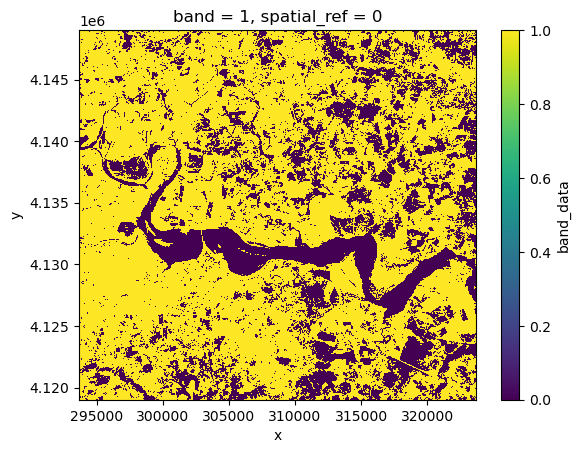

In [13]:
(band3_subset > 9100).plot()

In [23]:
band3_subset.where(band3_subset > 9100)

<xarray.DataArray 'band_data' (band: 1, y: 1000, x: 1000)> Size: 4MB
array([[[ 9593.,  9625., 10219., ...,    nan,    nan,    nan],
        [ 9739., 10158., 10376., ...,  9242.,    nan,    nan],
        [ 9969.,  9888., 10071., ...,    nan,    nan,    nan],
        ...,
        [10081., 10495., 10576., ...,    nan,  9144.,  9643.],
        [ 9498.,  9348.,  9524., ...,  9186.,  9328.,  9583.],
        [ 9631.,  9680.,  9992., ...,    nan,  9276.,  9597.]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8kB 2.937e+05 2.937e+05 ... 3.236e+05 3.237e+05
  * y            (y) float64 8kB 4.149e+06 4.149e+06 ... 4.119e+06 4.119e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point

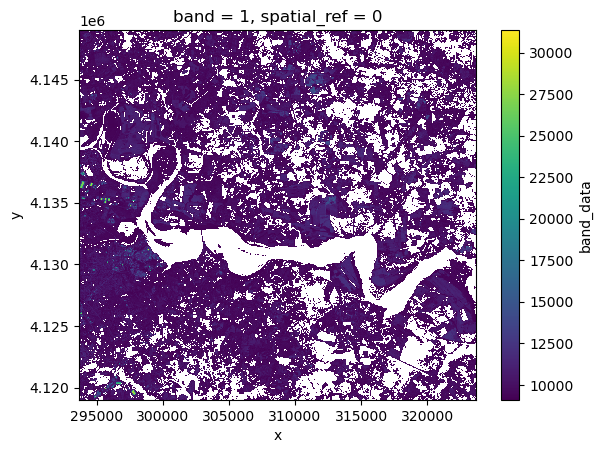

In [24]:
band3_subset.where(band3_subset > 9100).plot()

Masking with multiple conditions:

In [25]:
band3_subset.where((band3_subset > 9100) & (band3_subset < 10_000))

<xarray.DataArray 'band_data' (band: 1, y: 1000, x: 1000)> Size: 4MB
array([[[9593., 9625.,   nan, ...,   nan,   nan,   nan],
        [9739.,   nan,   nan, ..., 9242.,   nan,   nan],
        [9969., 9888.,   nan, ...,   nan,   nan,   nan],
        ...,
        [  nan,   nan,   nan, ...,   nan, 9144., 9643.],
        [9498., 9348., 9524., ..., 9186., 9328., 9583.],
        [9631., 9680., 9992., ...,   nan, 9276., 9597.]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8kB 2.937e+05 2.937e+05 ... 3.236e+05 3.237e+05
  * y            (y) float64 8kB 4.149e+06 4.149e+06 ... 4.119e+06 4.119e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point

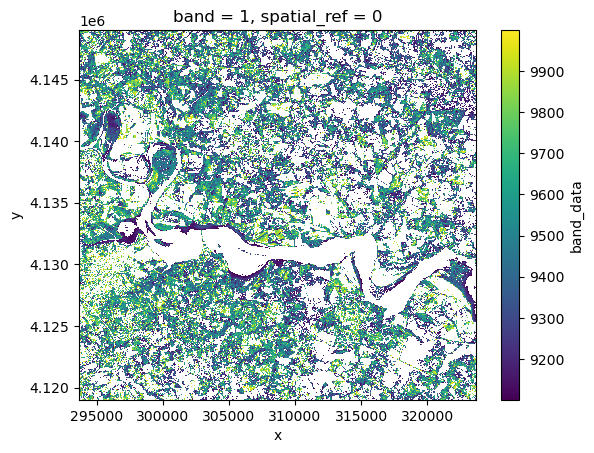

In [26]:
band3_subset.where((band3_subset > 9100) & (band3_subset <10_000)).plot()

## Practice: NDVI

## Example: Plotting with cartopy and reprojecting

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
ndvi = xr.open_dataset('data/ndvi.tif')

In [4]:
ndvi = ndvi.band_data

Reprojecting from one coordinate system to another

In [5]:
ndvi = ndvi.rio.write_crs("epsg:32618") 
ndvi = ndvi.rio.reproject(4326)

In [6]:
ndvi

<xarray.DataArray 'band_data' (band: 1, y: 7148, x: 8855)> Size: 253MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 71kB -78.74 -78.74 -78.74 ... -76.02 -76.02 -76.02
  * y            (y) float64 57kB 38.56 38.56 38.56 38.56 ... 36.37 36.36 36.36
  * band         (band) int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    long_name:      band_data
    _FillValue:     nan

In [7]:
ndvi.sel(y=37.5, x=-77.6, method='nearest')

<xarray.DataArray 'band_data' (band: 1)> Size: 4B
array([0.28642645], dtype=float32)
Coordinates:
    x            float64 8B -77.6
    y            float64 8B 37.5
  * band         (band) int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    long_name:      band_data
    _FillValue:     nan

Note: running this block of code many times will fill your memory and kill your kernel

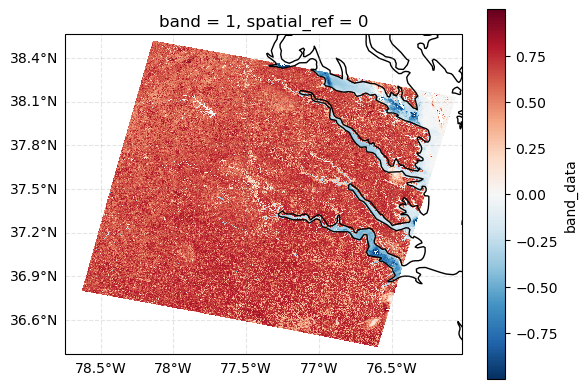

In [8]:
# Initalize the figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})

# Add geographic features
ax.coastlines()
gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.7)
gl.top_labels, gl.right_labels = False, False

# Add the data
ndvi.plot(ax=ax)

### Honorable Mention: Reprojecting a point from UTM to lat/lon

In [9]:
from pyproj import Transformer
from shapely.ops import transform
from shapely.geometry import Point

vcu = Point(-77.45, 37.55)

t = Transformer.from_crs(crs_from='epsg:4326', crs_to='epsg:32618', always_xy=True).transform
vcu_utm = transform(t, vcu)
print(vcu_utm.wkt)  # Prints easting, northing

POINT (283571.678065717 4158709.5993366367)
